In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Loading the dataset to pandas DataFrame from remote link
data = "https://raw.githubusercontent.com/TheCleverIdiott/Score_Predictor/main/Dataset"   
students_data = pd.read_csv(data)
students_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
students_data.shape
students_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#Checking for any missing values in the dataset
students_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

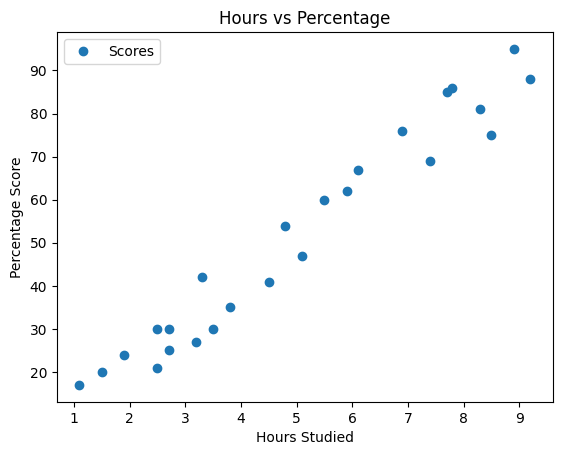

In [5]:
# Plotting the distribution of scores
students_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [6]:
# X contains independent variable and y contains dependent variable
X = students_data.iloc[:, :-1].values
y = students_data.iloc[:, 1].values

In [7]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [8]:
#splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
#TRAINING THE MODEL
from  sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
#For retrieving the slope (coefficient of x)
print(model.coef_)

[9.91065648]


In [11]:
#For retrieving the intercept
print(model.intercept_)

2.0181600414346974


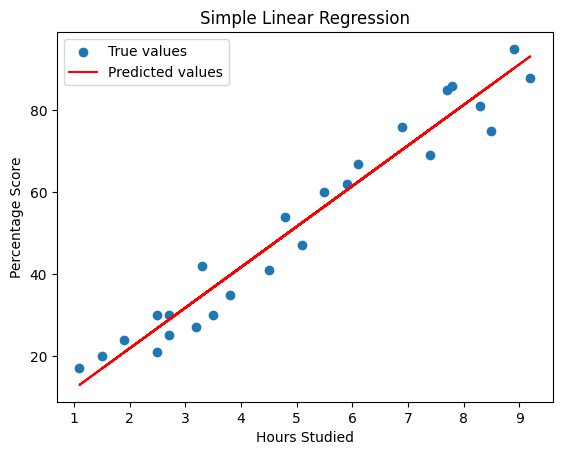

In [12]:
# Plotting the regression line
line = model.coef_*X+model.intercept_
# Plotting for the test data
plt.scatter(X, y,label="True values")
plt.plot(X, line,color="red",label="Predicted values")
plt.title('Simple Linear Regression')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.legend()
plt.show()

In [13]:
#Making Predictions
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [14]:
#Making prediction for 9.25 hours/day
hours=9.25
input_data_as_numpy_array=np.asarray(hours)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
own_prediction=model.predict(input_data_reshaped)
print("No. of Hours studied:",hours)
print("Predicted Score:",own_prediction)

No. of Hours studied: 9.25
Predicted Score: [93.69173249]


In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


In [16]:
#Conculsion: You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job